In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from google.colab import drive
from tensorflow.keras.models import load_model

# Monta tu Drive
drive.mount('/content/drive')

# Carga el modelo desde la carpeta organizada
model_path = '/content/drive/MyDrive/Colab Notebook - Models/chanchitos_model2.keras'
model = load_model(model_path)

print("Modelo cargado correctamente.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Modelo cargado correctamente.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
import os

# Ruta base en Drive
base_dir = '/content/drive/MyDrive/Colab Notebooks/dataset (pruebas)/nuevas-pruebas'  # Cambia esto si es necesario

# Verificar estructura de carpetas
for folder in ["validation", "unlabeled"]:
    folder_path = os.path.join(base_dir, folder)
    if os.path.exists(folder_path):
        print(f"✅ Carpeta encontrada: {folder}")
        print("Ejemplo de archivos:", os.listdir(folder_path)[:5])  # Muestra hasta 5 archivos
    else:
        print(f"❌ Carpeta no encontrada: {folder}")


✅ Carpeta encontrada: validation
Ejemplo de archivos: ['non_pig', 'pig']
✅ Carpeta encontrada: unlabeled
Ejemplo de archivos: ['unlabeled (39).png', 'unlabeled (37).png', 'unlabeled (36).png', 'unlabeled (38).png', 'unlabeled (21).png']


Found 600 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 405s 21s/step
Umbral óptimo (basado en AUC): 0.1324874758720398
Precisión: 0.8250
Precisión (Precision): 0.8328
Exhaustividad (Recall): 0.8133
Puntuación F1: 0.8229


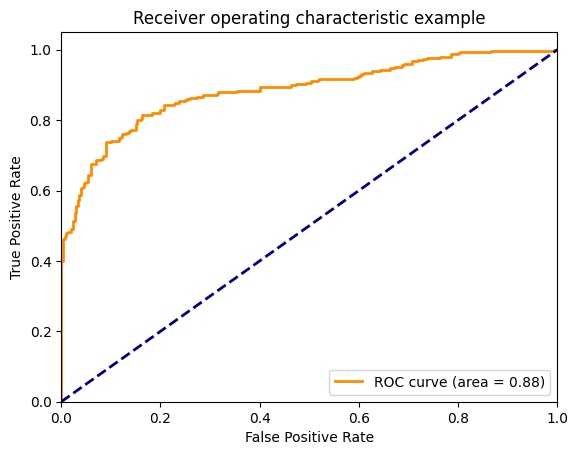

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# 1. Cargar el modelo y preprocesar las imágenes de validation:
model_path = '/content/drive/MyDrive/Colab Notebook - Models/chanchitos_model2.keras'
model = tf.keras.models.load_model(model_path)

validation_dir = '/content/drive/MyDrive/Colab Notebooks/nuevas-pruebas/validation'

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), # Ajusta al tamaño de entrada de tu modelo
    batch_size=32, # Ajusta según tu memoria disponible
    class_mode='binary', # 'categorical' si tienes más de 2 clases
    shuffle=False # Importante para alinear predicciones con etiquetas
)

# 2. Obtener las predicciones del modelo:
predictions = model.predict(validation_generator)

# 3. Obtener las etiquetas reales:
y_true = validation_generator.classes

# 4. Calcular la curva ROC y el umbral óptimo:
fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Umbral óptimo (basado en AUC): {optimal_threshold}")

# 5. Evaluar el modelo con el nuevo umbral:
y_pred = (predictions >= optimal_threshold).astype(int) # Aplicar el umbral

# Calcular y mostrar las métricas de evaluación:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precisión: {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"Puntuación F1: {f1:.4f}")

# (Opcional) Mostrar la curva ROC:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Cargar el modelo
model_path = '/content/drive/MyDrive/Colab Notebook - Models/chanchitos_model2.keras'
model = tf.keras.models.load_model(model_path)

# 2. Preprocesar las imágenes del conjunto de prueba
test_dir = '/content/drive/MyDrive/Colab Notebooks/dataset (pruebas)/nuevas-pruebas/validation'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# 3. Obtener predicciones y etiquetas reales
predictions = model.predict(test_generator)
y_true = test_generator.classes

# 4. Aplicar el umbral óptimo (obtenido en el paso anterior)
optimal_threshold =  0.1325 # Reemplaza con el valor que obtuviste antes
y_pred = (predictions >= optimal_threshold).astype(int)

# 5. Calcular y mostrar las métricas de evaluación
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precisión: {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"Puntuación F1: {f1:.4f}")

Found 600 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 315s 16s/step
Precisión: 0.8233
Precisión (Precision): 0.8322
Exhaustividad (Recall): 0.8100
Puntuación F1: 0.8209


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
Imagen: test_image_pig (34).png
Predicción: non_pig, Confianza: 0.19
Categoría real: pig
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
Imagen: test_image_pig (40).png
Predicción: non_pig, Confianza: 0.21
Categoría real: pig
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1

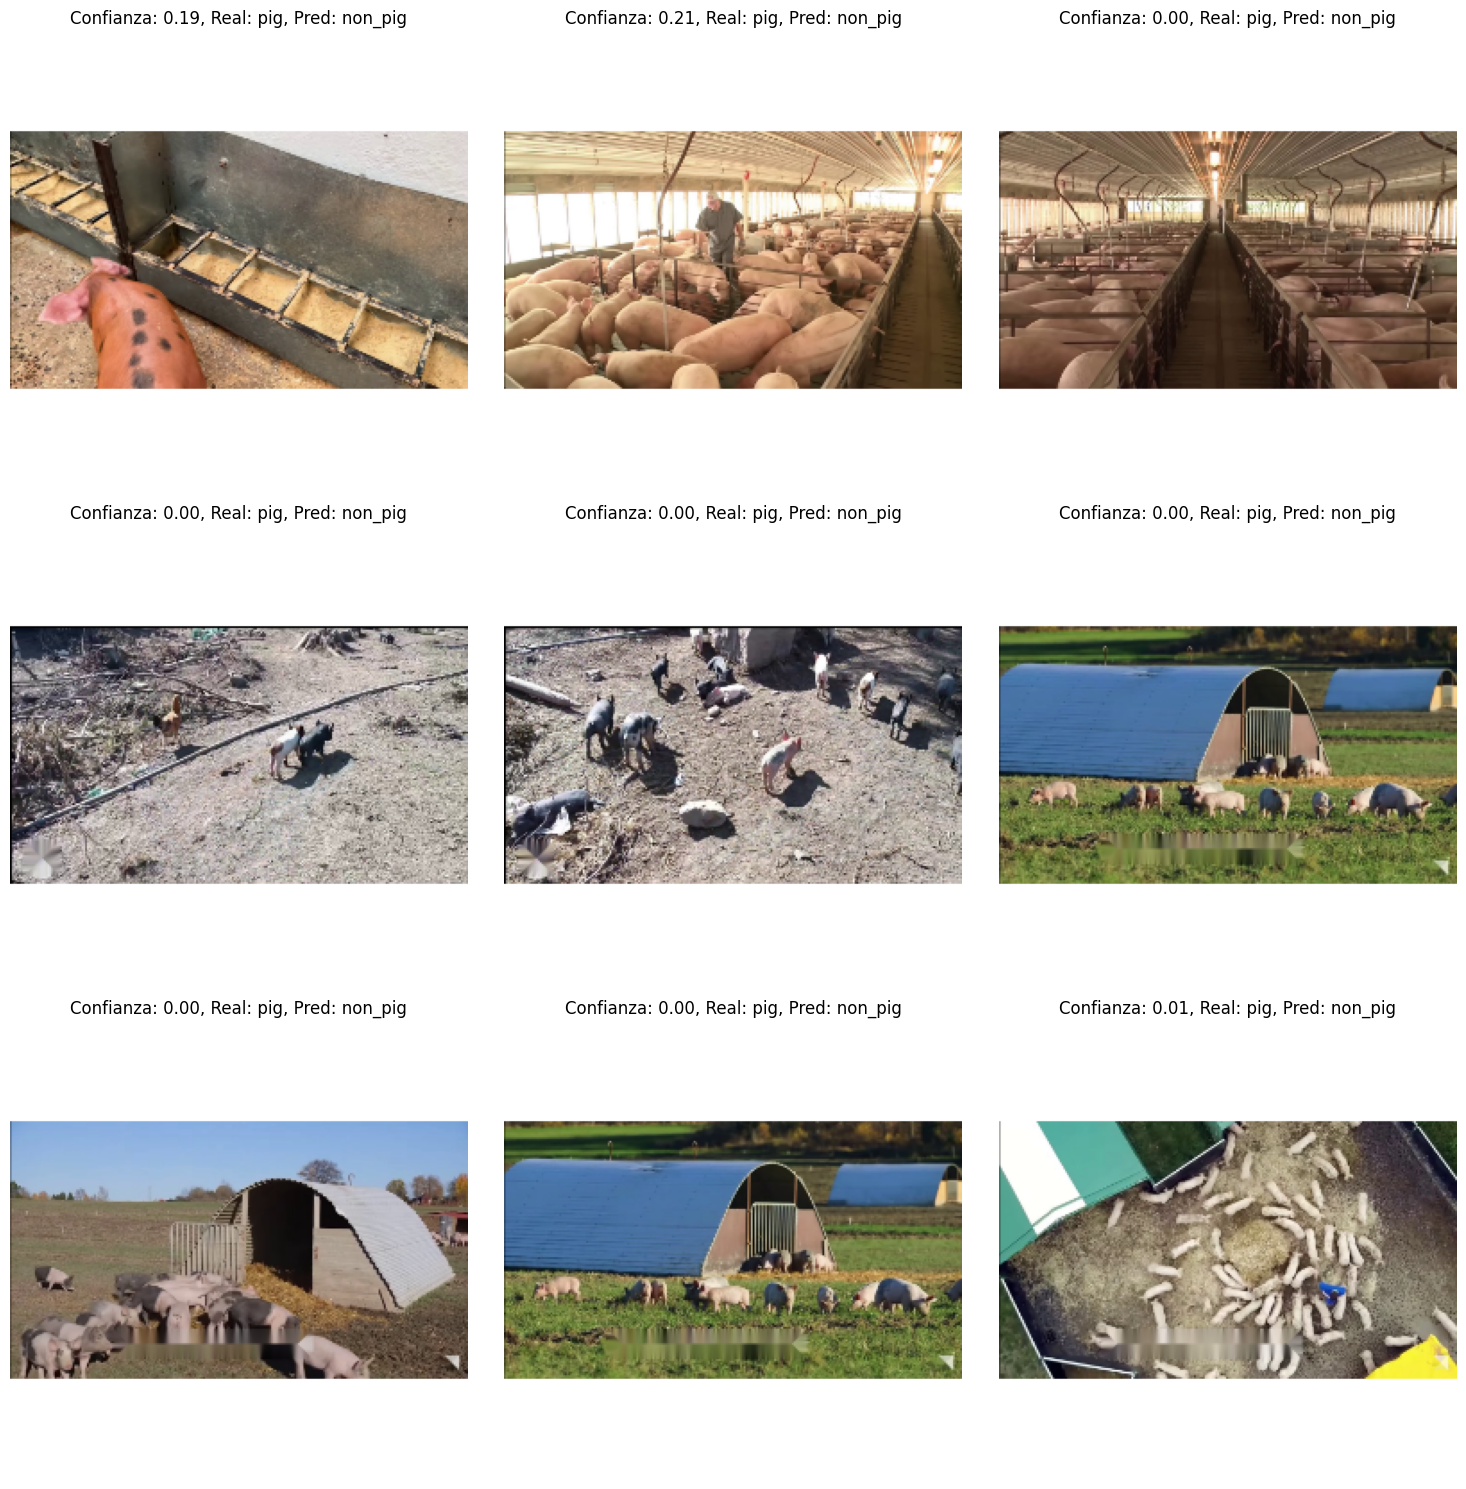

<Figure size 500x500 with 0 Axes>

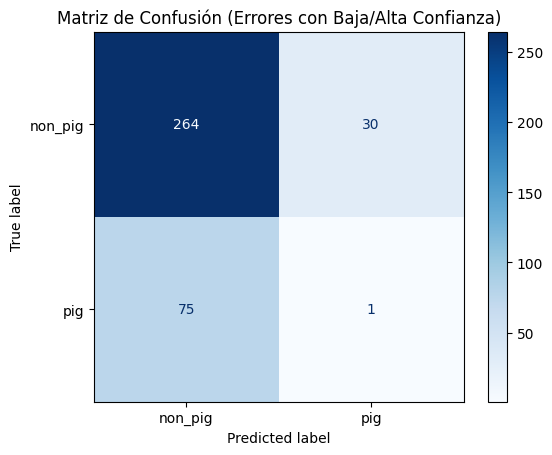


Información detallada de todas las imágenes con errores:
Imagen: test_image_pig (34).png
Predicción: non_pig, Confianza: 0.19
Categoría real: pig
--------------------
Imagen: test_image_pig (40).png
Predicción: non_pig, Confianza: 0.21
Categoría real: pig
--------------------
Imagen: test_image_pig (43).png
Predicción: non_pig, Confianza: 0.00
Categoría real: pig
--------------------
Imagen: test_image_pig (54).png
Predicción: non_pig, Confianza: 0.00
Categoría real: pig
--------------------
Imagen: test_image_pig (57).png
Predicción: non_pig, Confianza: 0.00
Categoría real: pig
--------------------
Imagen: test_image_pig (79).png
Predicción: non_pig, Confianza: 0.00
Categoría real: pig
--------------------
Imagen: test_image_pig (119).png
Predicción: non_pig, Confianza: 0.00
Categoría real: pig
--------------------
Imagen: test_image_pig (114).png
Predicción: non_pig, Confianza: 0.00
Categoría real: pig
--------------------
Imagen: test_image_pig (70).png
Predicción: non_pig, Confian

In [ ]:

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Directorio de validation
validation_dir = '/content/drive/MyDrive/Colab Notebooks/nuevas-pruebas/validation'
categories = ['pig', 'non_pig']
baja_confianza = []  # Lista para almacenar imágenes con ALTA/baja confianza y predicción INCORRECTA/correcta
umbral_confianza = 0.6 # Define el umbral de confianza

# Función para preprocesar la imagen (la misma que antes)
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img) / 255.0  # Normalizar
    img = np.expand_dims(img, axis=0)
    return img

# Evaluar imágenes en cada categoría
for category in categories:
    folder_path = os.path.join(validation_dir, category)  # Usamos validation_dir
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        img = preprocess_image(image_path)
        prediction = model.predict(img)[0][0]  # Probabilidad de ser "pig"
        predicted_class = "pig" if prediction > 0.5 else "non_pig"

        # Verificar ambos casos: alta y baja confianza
        if (prediction > umbral_confianza and category != predicted_class) or \
           (prediction < (1 - umbral_confianza) and category != predicted_class) or \
           (prediction < umbral_confianza and category == predicted_class and predicted_class == 'pig') or \
           (prediction < (1 - umbral_confianza) and category == predicted_class and predicted_class == 'non_pig'):

            baja_confianza.append((image_path, prediction, category, predicted_class))

            # Imprimir información detallada (opcional - puedes comentar estas líneas)
            print(f"Imagen: {file_name}")
            print(f"Predicción: {predicted_class}, Confianza: {prediction:.2f}")
            print(f"Categoría real: {category}")
            print("-" * 20)  # Separador

# Mostrar algunas imágenes con baja/alta confianza y error/acierto (opcional - puedes comentar estas líneas)
num_images = min(9, len(baja_confianza))  # Mostrar hasta 9 imágenes
if num_images > 0:
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()
    for i, (image_path, pred, true_cat, predicted_class) in enumerate(baja_confianza[:num_images]):
        img = load_img(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Confianza: {pred:.2f}, Real: {true_cat}, Pred: {predicted_class}")
    plt.tight_layout()
    plt.show()
else:
    print("No hay imágenes con baja/alta confianza y error/acierto para mostrar.")

# --- Matriz de Confusión ---
# Obtener las etiquetas reales y las predicciones de baja_confianza
y_true = [imagen[2] for imagen in baja_confianza]  # categoría real
y_pred = [imagen[3] for imagen in baja_confianza]  # clase predicha

# Convertir las etiquetas a valores numéricos (0 y 1)
y_true_num = [1 if label == 'pig' else 0 for label in y_true]
y_pred_num = [1 if label == 'pig' else 0 for label in y_pred]

# Crear matriz de confusión
cm = confusion_matrix(y_true_num, y_pred_num)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non_pig', 'pig'])

# Mostrar la matriz de confusión
plt.figure(figsize=(5, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión (Errores con Baja/Alta Confianza)")
plt.show()

# Mostrar información detallada de todas las imágenes con errores en una lista
print("\nInformación detallada de todas las imágenes con errores:")
for image_path, prediction, category, predicted_class in baja_confianza:
    print(f"Imagen: {os.path.basename(image_path)}")
    print(f"Predicción: {predicted_class}, Confianza: {prediction:.2f}")
    print(f"Categoría real: {category}")
    print("-" * 20)  # Separador

# Mostrar el número total de imágenes con baja/alta confianza y error/acierto
print(f"\nTotal imágenes con baja/alta confianza y error/acierto: {len(baja_confianza)}")

In [ ]:
from sklearn.metrics import classification_report

# Generar el reporte de precisión, recall y F1-score
report = classification_report(y_true, y_pred, target_names=categories)
print(report)



              precision    recall  f1-score   support

         pig       0.78      0.90      0.83       294
     non_pig       0.03      0.01      0.02        76

    accuracy                           0.72       370
   macro avg       0.41      0.46      0.43       370
weighted avg       0.63      0.72      0.67       370



In [ ]:
pip install tf-keras-vis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.4 MB/s eta 0:00:00


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,180 (9.87 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 164,099 (641.02 KB)